<a href="https://colab.research.google.com/github/nebuus/Stat_methods/blob/main/Statistical_methods_in_data_analysis_S2_S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import norm
import scipy.stats as ss
from scipy.misc import derivative
from scipy.special import erfinv, erf
from scipy.optimize import curve_fit
from pandas import read_csv
from scipy.optimize import minimize
import requests
from io import BytesIO
from PIL import Image
import math
from scipy.stats import beta

#Exercise 2

## Problem 1

In [2]:
#d = read_csv("/content/decay.txt", sep = ' ', header = None)
d = read_csv("https://raw.githubusercontent.com/nebuus/Stat_methods/main/decay.txt", sep = ' ', header = None)
data = pd.DataFrame(d)

Text(0.5, 0, 'Data')

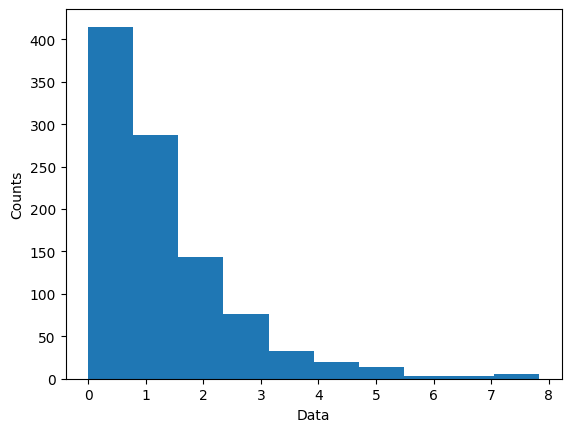

In [3]:
plt.hist(data, bins=10)
plt.ylabel('Counts')
plt.xlabel('Data')

## Problem 2

$PDF=\frac{1}{\tau}{e}^{(-\frac{t}{\tau})}$

In [4]:
def PDF(t, tau):
  return 1/tau*np.exp(-t/tau)

In [5]:
PDF(4, 1)

0.01831563888873418

In [6]:
tau_values = np.arange(0.0001, 50, 0.1)
t = 1
y_values = []
for tau in tau_values:
  y = PDF(t, tau)
  #print(y)
  y_values.append(y)

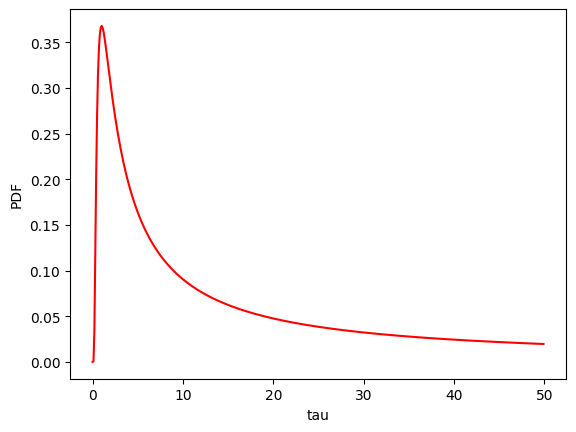

In [7]:
plt.plot(tau_values, y_values, color='r')
plt.ylabel('PDF')
plt.xlabel('tau')
plt.show()

In [8]:
tau = 2
p, err = integrate.quad(PDF, 0, 1, args=(tau))
print(f'Probability to measure t = 1 or less ir {p}')

Probability to measure t = 1 or less ir 0.3934693402873665


## Problem 3

For a single measurement the likelihood function would be the same as PDF therefore the plot is the same \
$L(\tau)=\frac{1}{\tau}{e}^{\frac{-t_1}{\tau}} $

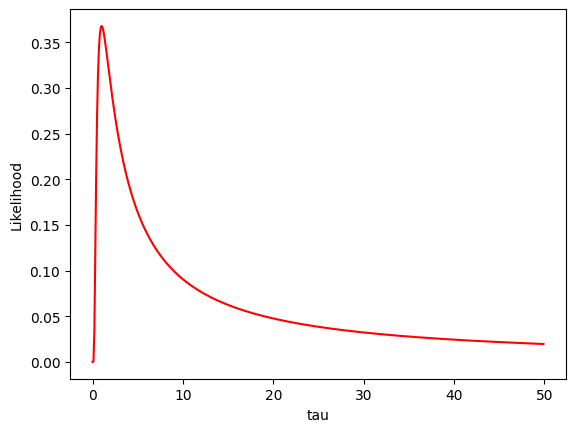

In [9]:
plt.plot(tau_values, y_values, color='r')
plt.ylabel('Likelihood')
plt.xlabel('tau')
plt.show()

In [10]:
indmax = np.argmax(y_values) #the max from problem 2
tau_max = tau_values[indmax]

tau_max

1.0001

For 100 data points it would be the product of all probabilities: \
$L(\tau)=\prod_{i=1}^{100}\frac{1}{\tau}{e}^{\frac{-t_i}{\tau}} $ \
\
or simplified \
\
$L(\tau)=(\frac{1}{\tau})^{100}{e}^{(-\sum_{i=1}^{100}{\frac{t_i}{\tau}})} $ \
\
It is easier to simplify because of the exponent

##Problem 4

In [11]:
def loglike(tau, data):
  n = len(data)
  return n * np.log(tau) + (1 / tau) * np.sum(data)

In [12]:
teta = []
for tau in tau_values:
  c = loglike(tau, data)*-2
  teta.append(c)

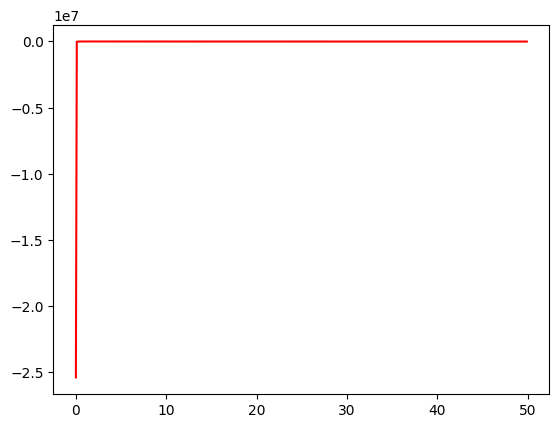

In [13]:
plt.plot(tau_values, teta, color='r')
plt.show()
#We use log-likelihood because sum is easier/quicker to do than product?

In [14]:
max_nll_index = np.argmax(teta)
optimal_tau = tau_values[max_nll_index]
print(f"Estimated tau: {optimal_tau}")

Estimated tau: 1.3001


In [15]:
np.mean(data)

1.271264743584974

## Problem 5

In [16]:
data = data
initial_guess = 1.0

result = minimize(loglike, initial_guess, args=(data,), bounds=[(0.0001, None)])

tau_hat = result.x[0]
print(f"Estimated tau: {tau_hat}")

Estimated tau: 1.2712647954271792


Mean lifetime is slightly different - 1.3 by our method and 1.27 using a library. This is probably due to the step that I took in creating the tau data arrey which was 0.1. The library "minimize" function includes approximation, it works well if You know some expected value, but may converge to a different value if initial guess is way off (probably).

#Exercise 3

##Problem 1

In [17]:
d = {'a': [9.8, 21.2, 34.5, 39.9, 48.5], 'a_err': [1, 1.9, 3.1, 3.9, 5.1], 'F': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data=d)
df

,a,a_err,F
0,9.8,1.0,1
1,21.2,1.9,2
2,34.5,3.1,3
3,39.9,3.9,4
4,48.5,5.1,5


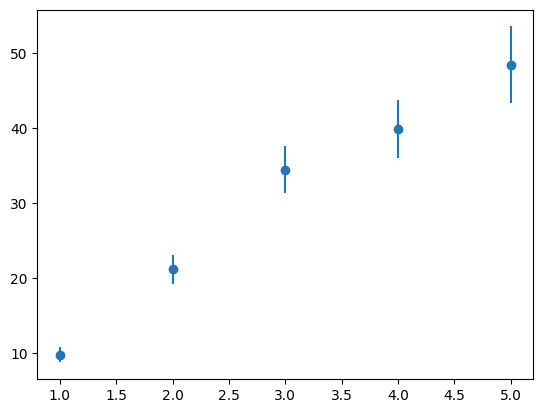

In [18]:
plt.errorbar(df['F'], df['a'], yerr = df['a_err'], fmt='o')
plt.xlabel = "F, N"
plt.ylabel = "a, m/s^2"
plt.show()

In [19]:
def lin(x,a):
  return a*x

In [20]:
popt, pcov = curve_fit(lin, df['F'], df['a'], sigma = df['a_err'])
yfit = lin(df['F'],*popt)

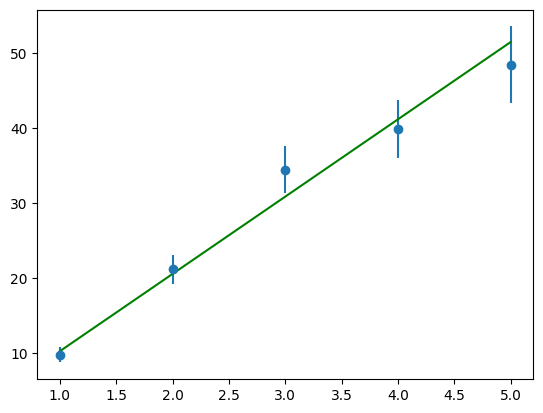

In [21]:


plt.errorbar(df['F'], df['a'], yerr = df['a_err'], fmt='o')
plt.plot(df['F'],yfit, label = "Data", color = "g")
plt.show()

In [22]:
#Since a=F/m or a=1/m*F where 1/m=a(from the lin function)
mass = 1/popt

In [23]:
er = np.sqrt(pcov[0,0])
er

0.32638911475772475

In [24]:
residuals_1 = sum((df['F']/mass-df['a'])**2)
error_1 = np.sqrt((residuals_1/4))/(sum(df['F']**2))
error_1

0.04489897173690772

In [25]:
print(f' m is equal to {mass} and the residuals are {residuals_1}, with corresponding error of {error_1}, its using nonlinear least squares')

 m is equal to [0.09701725] and the residuals are 24.392603722682818, with corresponding error of 0.04489897173690772, its using nonlinear least squares


##Problem 2

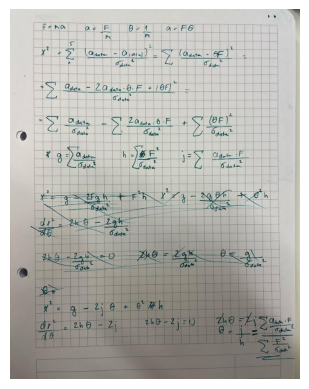

In [26]:
req = requests.get('https://raw.githubusercontent.com/nebuus/Stat_methods/main/LSM.png')

image = Image.open(BytesIO(req.content))
plt.axis('off')
plt.imshow(image)

In [27]:
omega = sum(df['a']*df['F']/np.std(df['a'])**2)/sum(df['F']**2/np.std(df['a'])**2) #Just realized its actually theta, sorry for my greek

In [28]:
m_hat=1/omega

In [29]:
residuals_2 = sum((df['F']/m_hat-df['a'])**2)
error_2 = np.sqrt((residuals_2/4))/(sum(df['F']**2))
error_2

0.04348821269177971

In [30]:
print(f' m_analytical is equal to {m_hat} and m_fit is equal to {mass}, analytical result is slightly larger. \n It is not always possible to do it analytically, because you have to know math to do it :D, \n also i would guess that it gets vastly more complex to do if the function is not linear. ')

 m_analytical is equal to 0.09860164933667982 and m_fit is equal to [0.09701725], analytical result is slightly larger. 
 It is not always possible to do it analytically, because you have to know math to do it :D, 
 also i would guess that it gets vastly more complex to do if the function is not linear. 


##Problem 3

In [31]:
df

,a,a_err,F
0,9.8,1.0,1
1,21.2,1.9,2
2,34.5,3.1,3
3,39.9,3.9,4
4,48.5,5.1,5


In [32]:
chis = []
thetas = np.arange(0,20, 0.01)
for thet in thetas:
  chi2 = sum((df['a']-thet*df['F'])**2/np.std(df['a'])**2)
  chis.append(chi2)

In [33]:
plt.clf()

<Figure size 640x480 with 0 Axes>

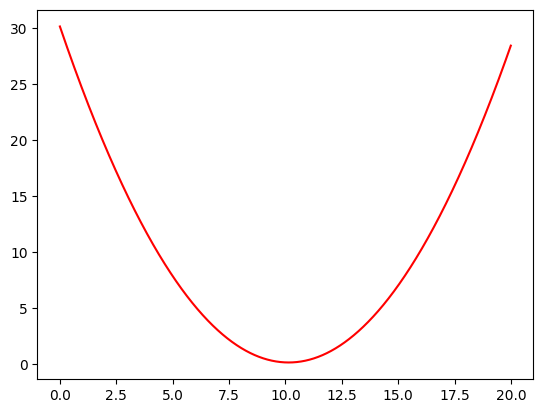

In [34]:
plt.plot(thetas, chis, color='r')
#plt.ylabel('chi value') #for some reason i cant add labels
#plt.xlabel('theta value')
plt.show()

In [35]:
indmin = np.argmin(chis)
theta_min = thetas[indmin]

theta_min

10.14

In [36]:
mass_3 = 1/theta_min

In [37]:
mass[0]

0.09701724677005527

In [38]:
residuals_3 = sum((df['F']/mass_3-df['a'])**2)
error_3 = np.sqrt((residuals_3/4))/(sum(df['F']**2)) #divided by 4 because n=5 and optimized parameter is 1
error_3 # I am not sure about this one

0.04348838545429674

In [39]:
aaaa = np.sqrt((residuals_3/4))
aaaa

2.3918611999863204

In [40]:
mases = {'Linear fit': [m_hat, error_1], 'Analytical': [mass[0], error_2], 'Graphical': [mass_3, error_3]}
df_mases = pd.DataFrame(data=mases)
df_mases

,Linear fit,Analytical,Graphical
0,0.098602,0.097017,0.098619
1,0.044899,0.043488,0.043488


In [41]:
print("Precision of analytical and graphical methods is the same, but their values are slightly different. \nI think that the graphical method would somewhat coverge to the analytical one if the step at the minimum would be very small (gradient descent maybe?). \nBut i would also emphasize that linear fit method was by far the easiest, because i did not need to know anything to perform it")

Precision of analytical and graphical methods is the same, but their values are slightly different. 
I think that the graphical method would somewhat coverge to the analytical one if the step at the minimum would be very small (gradient descent maybe?). 
But i would also emphasize that linear fit method was by far the easiest, because i did not need to know anything to perform it


##Problem 4

In [42]:
theta_err_3 = np.sqrt(residuals_3)
theta_plus_err = theta_min + theta_err_3
theta_minus_err = theta_min - theta_err_3

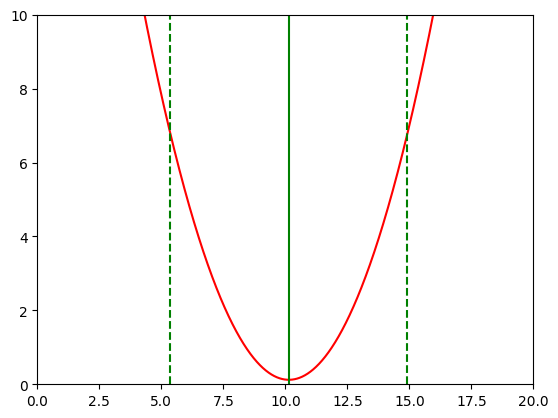

In [43]:
plt.plot(thetas, chis, color='r')
plt.axvline(x=theta_min,color='g')
plt.axvline(x=theta_plus_err,color='g', linestyle='dashed')
plt.axvline(x=theta_minus_err,color='g', linestyle='dashed')
ax = plt.gca()
ax.set_xlim([0, 20])
ax.set_ylim([0, 10])
#plt.fill_between(thetas, y=mass_3-error_3, y=mass_3+error_3)
plt.show()
#plt.ylabel('chi value') #for some reason i cant add labels
#plt.xlabel('theta value')

In [44]:
# Cant remember what this was, but ill just leave it here
m_ideal = 0
chi_value = 100000000
potential_ms = np.arange(0, 0.2, 0.0001)
for x in potential_ms:
  chi_value_new = sum((df['m'] - x)**2 / df['m_err']**2)
  if chi_value_new < chi_value:
    m_ideal = x
    chi_value = chi_value_new
print(m_ideal)

KeyError: 'm'

# Exercise 4

## Problem 1

In [45]:
def binomial(r,p,N):
  return (math.factorial(N)/(math.factorial(r)*math.factorial(N-r)))*(p**r)*((1-p)**(N-r))

It seems to produce the correct values.
I don't see the necessity to take care of r=0, r=N, p=0, p=1 since all of these would end up creating factorial of 0, which is 1.
The maximum value for the math.factorial() function is 20.
I'd assume that for big values the computing time for a factorial is massive, not sure how i would avoid the problem, maybe by choosing a different method without factorials? Or splitting the factorials into multiplications of smaller numbers.

In [46]:
binomial(20,20,20) #potentially the max input values to give output

1.048576e+26

##Problem 2

In [48]:
# This is not relevant
#def sigma(p, N):
#  return np.sqrt(p*(1-p)/N)
#1sigma = 68%
#2sigma = 95%
#sigma = 99%

In [98]:
def lower(r,p,N):
  r_values = range(0,r+1)
  res = []

  for r in r_values:
    z = binomial(r, p, N)
    res.append(z)

  lower = sum(res)
  return lower

In [102]:
lower(134,0.536,250)

0.5246669514312123

In [97]:
def upper(r,p,N):
  r_values = range(r,N+1)
  res = []

  for r in r_values:
    z = binomial(r, p, N)
    res.append(z)

  upper = sum(res)
  return upper

In [119]:
upper(140,0.536,250)

0.24302447280948042

In [99]:
p_values = np.arange(0,1.001,0.001)

In [126]:
def clopper_pearson_interval(r, N, CL):
  alpha = 1 - CL

  for p in reversed(p_values):
    if upper(r, p, N) >= alpha / 2:
        p_upper = p


  for p in p_values:
    if lower(r, p, N) >= alpha / 2:
        p_lower = p

  return p_upper, p_lower

In [131]:
clopper_pearson_interval(134, 250, 0.68)

(0.503, 0.5690000000000001)

In [129]:
# Checking with a library result
r = 134
n = 250
alpha = 0.05
p_u, p_o = beta.ppf([alpha/2, 1 - alpha/2], [r, r + 1], [n - r + 1, n - r])
p_u, p_o

(0.47207008350068286, 0.5990662909047608)

##Problem 3

In [ ]:
asfa

##Problem 4

In [ ]:
fasfasf